# Step By Step Data Analysis on Advertising DataSet

In [1]:
#Linear Regressioin
#Work on dataset advertising.csv
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# To load data set
df=pd.read_csv('advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
#To remove column Unnamed: 0 permanently from dataframe
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
#To check null values
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

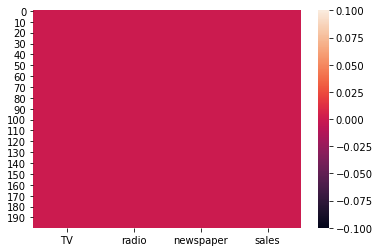

In [5]:
#To check null values
sb.heatmap(df.isnull())
plt.show()

In [6]:
#To check null values with out graph
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


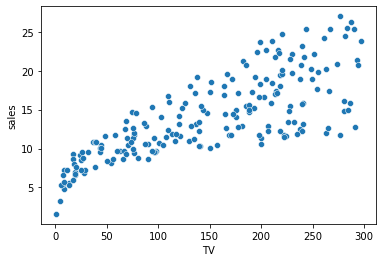

In [7]:
#First check the relation between input and output
#Use scatter plot
#Draw scatter plot between independent variable means input variables TV and Target means output means dependent,
# variable sales
sb.scatterplot(data=df,x='TV',y='sales')
plt.show()

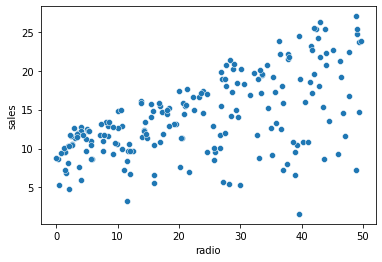

In [8]:
##Draw scatter plot between independent variable means input variables radio and Target means output means dependent,
# variable sales
sb.scatterplot(data=df,x='radio',y='sales')
plt.show()

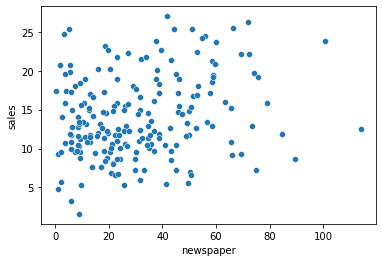

In [9]:
#Draw scatter plot between independent variable means input variables newspaper and Target means output means dependent,
# variable sales
sb.scatterplot(data=df,x='newspaper',y='sales')
plt.show()

In [10]:
# To show all columns
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

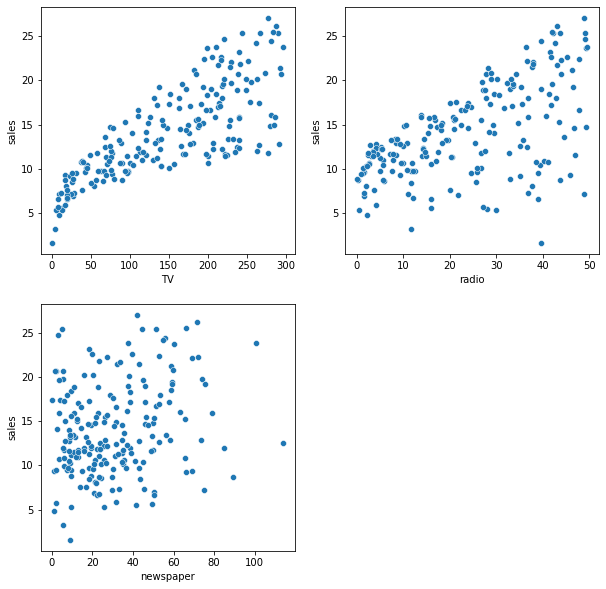

In [11]:
#To show all column of graph together
plt.figure(figsize=(10,10))
x=['TV', 'radio', 'newspaper']
y=df['sales']
for i,col in enumerate(x): #enumerate() : return 2 values from list
    #1.index    2. Value at index
    plt.subplot(2,2,i+1) #subplot(rows,cols)
    sb.scatterplot(df[col],y)#plt.scatter(x,y)
plt.show()

In [12]:
#Nice upword growth that means as we investment more on TV the sales is also
#increasing that means +ve correlation means good +ve correlation between
#TV(input) with sales(output)

#see the scatter plot radio with sales : - looks better but lot of data is 
#scattered but scatter data overhere +ve correlation, But correlation is less
#as compared to TV

#the scatter plot newspaper with sales is very bed correlation means no +ve 
#corr and no -ve corr means no
#correlation newspaper with sales because data point are scattered

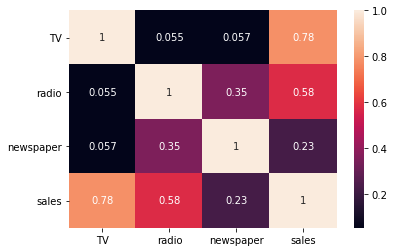

In [13]:
#To check correlation between input and output We use sb.heatmap(df.corr(),annot=True)
sb.heatmap(df.corr(),annot=True)
plt.show()

In [14]:
#correlation values with TV and sales=0.78 , It is very good
#correlation values with radio and sales=0.58 , It is good(ok)
#correlation values with newspaper and sales=0.23 , It is very bad

# Performing the model

In [15]:
#Modeling with linear : Tv and output sales
#Simple Linear Regression(SLR): only on input
#Select input and output from dataset
x=df[['TV']]#independent variable(Input) always input 2Darray
y=df['sales']#dependent means target means output variable which wants to predict

In [16]:
#Total shape of Data set
df.shape

(200, 4)

# Train the split

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
#Create object of  train_test_split
#train_test_split() : inbuilt  function It is used to split dataset 
#into training and testing , 70% data use in training and 30% data used in
#testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [19]:
#Shape of train data set
x_train.shape

(140, 1)

In [20]:
x_train.head()

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4


In [21]:
x_train.head(20)

,TV
116,139.2
67,139.3
78,5.4
42,293.6
17,281.4
5,8.7
127,80.2
105,137.9
48,227.2
66,31.5


In [22]:
#Performing the linear regression model
#Create a model with the help of Linear Regression
#Call Linear Regression class
from sklearn.linear_model import LinearRegression

In [23]:
#Create the object of Linear Regression class
lr=LinearRegression()

In [24]:
#Train the model we use fit() inbuilt method of LinearRegression class
lr.fit(x_train,y_train)

LinearRegression()

In [25]:
#To show slope means coefficent and intercept
print("slope :",lr.coef_)
print("intercept :",lr.intercept_)

slope : [0.04812204]
intercept : 6.923519536059554


In [26]:
#Test the model
#ML always gives predicted output
y_pred=lr.predict(x_test) #y_pred=m*x_test+b-->formula
y_pred

array([17.06764591, 16.66823297, 11.52879892, 20.4073156 , 19.1368937 ,
       20.57093054, 14.78184893, 15.62398466, 10.32093567, 17.2890073 ,
       14.83959538, 10.25356482, 17.25532187, 12.20731971, 17.78947654,
       12.97246017, 13.26119242, 20.91259704,  8.1554438 , 17.06283371,
       11.75497252, 10.18619396,  8.13138278, 12.09182681, 12.35649804,
       15.98971218,  8.99757953, 18.89628349, 14.95027608, 18.47762173,
       18.46799732, 18.2081383 , 14.12738917, 15.11389102, 18.87703468,
       15.82128503, 17.62586159, 13.15051172, 17.35637816,  7.86671155,
        7.55391828, 11.2737521 ,  7.82340171, 16.74522823,  7.27481044,
       14.01189627, 10.68666319, 17.89534503, 16.78853807, 17.96752809,
       20.864475  , 12.84734286,  7.85708714, 15.71060434, 19.70473379,
       14.89252963, 17.43818563,  8.12657058, 18.0926454 ,  8.99276733])

In [27]:
#actual output
y_test.head()

58     23.8
40     16.6
34      9.5
102    14.8
184    17.6
Name: sales, dtype: float64

In [28]:
from sklearn.metrics import mean_squared_error 

In [109]:
# Mean_squared_error the ultimate goal is minimise the cost function and get best fit line
#return total no. of error
mean_squared_error(y_test,y_pred) #formula sum(y-y_pred)^2/N

1.9147050289721788

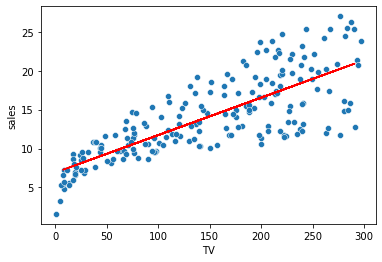

In [30]:
sb.scatterplot(data=df,x="TV",y="sales")
plt.plot(x_test,y_pred,color="red")
plt.show()

In [31]:
#Remove R-2 squared formula=(tss-rss)/tss 
#where tss means total sum of squares 
#rss means residual sum of squared
#range of R-2 score is 0 to 1
from sklearn.metrics import r2_score

In [32]:
r2_score(y_test,y_pred)

0.575061860494331

# 8-12-2021

# OLS means ordinary least square method

In [33]:
#Create dictionary 
d={"y_test":y_test,"y_predict":y_pred}

In [107]:
#Create dataframe df1 with the help of dictionary d
df1=pd.DataFrame(d)
df1.head()

,y_test,y_predict
58,23.8,17.067646
40,16.6,16.668233
34,9.5,11.528799
102,14.8,20.407316
184,17.6,19.136894


In [35]:
#Adding new column
df1["TV"]=x_test

In [108]:
df1.head()#y_pred=m*x_test+b

,y_test,y_predict
58,23.8,17.067646
40,16.6,16.668233
34,9.5,11.528799
102,14.8,20.407316
184,17.6,19.136894


# radio

In [37]:
x=df[['radio']]#independent variable(Input) always input 2Darray
y=df['sales']#dependent means target means output variable which wants to predict

In [38]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [39]:
#Train the model
lr1=LinearRegression()

In [40]:
#train the model
lr1.fit(x_train,y_train)

LinearRegression()

In [41]:
#testing the model
y_pred=lr1.predict(x_test)

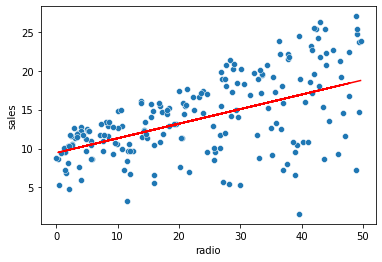

In [42]:
sb.scatterplot(data=df,x="radio",y="sales")
plt.plot(x_test,y_pred,color="red")
plt.show()

In [43]:
print("slope :",lr1.coef_)
print("intercept :",lr1.intercept_)

slope : [0.1874808]
intercept : 9.440936561425886


In [44]:
#Show mean_squared_error
#return total no. of error
mean_squared_error(y_test,y_pred) #formula sum(y-y_pred)^2/N

14.604130559272193

In [45]:
r2_score(y_test,y_pred)

0.41293932917162335

# newspaper

In [46]:
x=df[['newspaper']]#independent variable(Input) always input 2Darray
y=df['sales']#dependent means target means output variabl

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [48]:
#Train the model
lr2=LinearRegression()

In [49]:
#train the model
lr2.fit(x_train,y_train)

LinearRegression()

In [50]:
#testing the model
y_pred=lr2.predict(x_test)

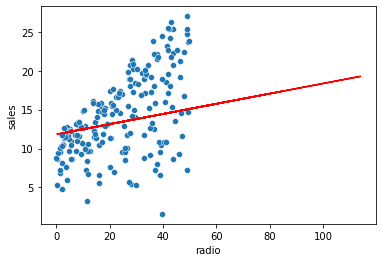

In [51]:
sb.scatterplot(data=df,x="radio",y="sales")
plt.plot(x_test,y_pred,color="red")
plt.show()

In [52]:
print("slope :",lr2.coef_)
print("intercept :",lr2.intercept_)

slope : [0.06532045]
intercept : 11.829668884877877


In [53]:
#Show mean_squared_error
#return total no. of error
mean_squared_error(y_test,y_pred) #formula sum(y-y_pred)^2/N

25.49745237441493

In [54]:
r2_score(y_test,y_pred)

-0.024953278429509007

# Multiple Linear Regression

In [55]:
'''slope of TV : 0.04812204  and MSE of TV  :  10.571057434656955 r2-score=0.578
slope of radio :0.1874808 and MSE of radio : 14.604130559272193 r2-score=0.41
slope of newspaper : 0.06532045 and MSE of newspaper :25.49745237441493 r2=-0.02
'''

'slope of TV : 0.04812204  and MSE of TV  :  10.571057434656955 r2-score=0.578\nslope of radio :0.1874808 and MSE of radio : 14.604130559272193 r2-score=0.41\nslope of newspaper : 0.06532045 and MSE of newspaper :25.49745237441493 r2=-0.02\n'

In [56]:
#Multiple Linear Regression(MLR):many input and one output
#equation of mlr:y_pred=m1*x1+m2*x2+m3*x3+........+b
#select input and output from datset:df
x=df[["TV","radio","newspaper"]]#input features always2D
y=df["sales"]#target means output:1D

In [57]:
#train_test_split() : inbuilt  function It is used to split dataset 
#into training and testing , 70% data use in training and 30% data used in
#testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [58]:
x_train.shape

(140, 3)

In [59]:
x_test.head()

,TV,radio,newspaper
58,210.8,49.6,37.7
40,202.5,22.3,31.6
34,95.7,1.4,7.4
102,280.2,10.1,21.4
184,253.8,21.3,30.0


In [60]:
#create object of linearRegression
lr3=LinearRegression()

In [61]:
#train the model
lr3.fit(x_train,y_train)

LinearRegression()

In [62]:
#test the model
y_pred=lr3.predict(x_test)

In [63]:
# to show coefficent/slope and intercept
print("coefficent/solpe : ",lr3.coef_)
print("intercept : ",lr3.intercept_)

coefficent/solpe :  [0.04695205 0.17658644 0.00185115]
intercept :  2.937215734690609


In [64]:
#Show mean_squared_error
#return total no. of error
mean_squared_error(y_test,y_pred) #formula sum(y-y_pred)^2/N

1.9289249074665735

In [65]:
r2_score(y_test,y_pred)

0.9224605706201434

In [66]:
#here r2-score is best because nearest to +1 and MSE is very low means we
#create a successful model

In [67]:
#But 
# Assumptions of Linear Regression : -
'''1. should not be Multicolinearity in linear regression  
 Solve this assumption .means we removed the Multicolinearity situation
 2. Assumption :  Linear relationship means There should be a linear relation
 ship. 
 when does linear regression  do best work ? 
 where got better relationship 
 
 we cannot see 3D graph on system so we have some hack(trick) , how to 
 check input and output both are related or not
 we calculate the residual (this is error means 
 Residual =(actual output-predicted output)
 '''

'1. should not be Multicolinearity in linear regression  \n Solve this assumption .means we removed the Multicolinearity situation\n 2. Assumption :  Linear relationship means There should be a linear relation\n ship. \n when does linear regression  do best work ? \n where got better relationship \n \n we cannot see 3D graph on system so we have some hack(trick) , how to \n check input and output both are related or not\n we calculate the residual (this is error means \n Residual =(actual output-predicted output)\n '

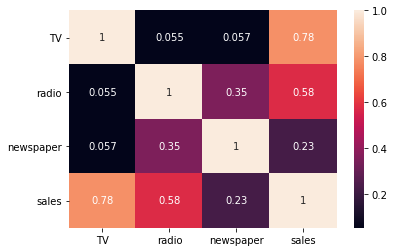

In [68]:
#check Multicolinearity
sb.heatmap(df.corr(),annot=True)
plt.show()

In [69]:
#here input radio and newspaper both are corelated each other value of corr 
#between radio and newspaper =0.35 means multicolinearity situation occurs
#so check corr of both input radio and newspapaer with o/p and remove those 
#input column whose corr value with o/p will be less 
#here newspaper is less correlated with o/p sales as compared to radio with
#sales so remove newspaper from dataset 
#and perform TV and radio with sales

In [70]:
#corr value of radio with sales :  0.58  
#corr value of newspaper with sales : 0.23
#corr value of radio and newspaper(both are input and correlated each other:0.35
#so we decided , remove newspaper because corr of radio with sales>newspaper 
#with sales
#We have input TV and radio and target sales
x=df[["TV","radio"]] #input TV and radio : 2D array
y=df["sales"] #output which want to predict : always 1 D array

In [71]:
#train_test_split() : inbuilt  function It is used to split dataset 
#into training and testing , 70% data use in training and 30% data used in
#testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [72]:
x_train.shape

(140, 2)

In [73]:
x_test.head()

,TV,radio
58,210.8,49.6
40,202.5,22.3
34,95.7,1.4
102,280.2,10.1
184,253.8,21.3


In [74]:
#create object of linearRegression
lr4=LinearRegression()

In [75]:
lr4.fit(x_train,y_train)

LinearRegression()

In [76]:
y_pred=lr4.predict(x_test)

In [77]:
# to show coefficent
lr4.coef_

array([0.04697554, 0.17765046])

In [78]:
mean_squared_error(y_test,y_pred)

1.9147050289721788

In [79]:
r2_score(y_test,y_pred)

0.9230321850256801

# 13-12-2021

# Assumption of Lr

In [110]:
#1.Multicolinearity Assumption of Linear Regression 
#2.there should be a linear relationship
#3.if occur linear relation then next check relation is homoskedatik means-->(datapoints close to line)
#not a heteroskedastik means-->(datapoints not close to line)
#4.Normal distributed means (there should not be a skewness mean,median,mode should be in one point)

In [81]:
#trick
#find the residuals
residuals=y_test-y_pred
print(residuals)

58     2.121325
40     0.161080
34     1.790963
102   -3.121584
184   -1.071115
198    1.751649
95     0.650372
4     -0.476570
29     1.376352
168   -0.175850
171    0.094861
18     1.442691
11     0.085973
89     0.085626
110   -1.628579
118    0.475105
159    0.479785
35    -4.548925
136   -1.595709
59     0.296797
51     1.313444
16    -0.151716
44    -0.209470
94     1.002953
31     0.540576
162   -0.130433
38     0.367320
28    -0.566610
193    1.338393
27    -1.310358
47     1.593306
165   -2.684544
194    0.978638
177   -0.645678
176    0.201464
97     0.118795
174   -2.516140
73     0.943990
69     1.352080
172    0.143738
108    1.648793
107    1.435349
189    0.707220
14     0.602824
56    -2.799666
19     0.469889
114   -0.352296
39     1.127387
185    1.993211
124    0.216236
98     1.311803
123    0.305838
119   -0.118500
53     1.450047
33    -1.594481
179    0.079578
181   -1.988236
106    1.106689
199   -1.995585
138    0.014138
Name: sales, dtype: float64


In [82]:
print(y_pred)

[21.6786746  16.43892004  7.70903733 17.92158421 18.67111499 23.74835071
 16.24962798 13.37657045  9.12364788 17.27585015 14.40513872  9.85730919
 17.31402746 16.61437382 15.02857874 15.42489496 12.42021473 17.34892466
 11.09570896 18.10320281  9.38655615 12.65171582  8.70947008 10.49704698
 11.35942404 15.03043294  9.73268033 19.46660993 18.26160716 17.21035792
 21.60669421 14.58454377 16.32136242 12.3456783  19.99853614 15.38120487
 14.01613968 10.05601014 20.94792024  7.45626202  3.65120693  7.26465144
  5.99278035 18.39717578  8.2996665  14.13011074 14.95229617 20.37261349
 20.60678937 19.48376432 24.08819667 14.89416249  6.71850002 19.74995269
 18.99448081 12.52042181 14.18823598  6.09331077 15.39558485  9.58586241]


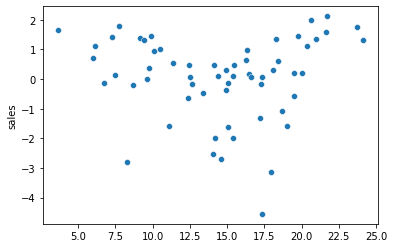

In [83]:
#visualize scatterplot between y_pred anbd residuals means 
#here input x=y_pred and y=residuals because residuals depend on y_pred value
plt.figure()
sb.scatterplot(y_pred,residuals)
plt.show()

In [84]:
# in above scatterplot, This is not a linear relation between Y_pred
# and residules means no relation between x=["TV","radio"] with sales o/p
#means this assumption is not fullfill

# normal distributed curve then use inbuilt function displot() of seaborn

In [85]:
#4. Assumption of linear regression : - Residuals should be normally distributed
#curve means data should be euqally divide on both sides.
#normal distributed curve then use inbuilt function displot() of seaborn
#library ,distplot is also known as frequency graph
#use distplot()

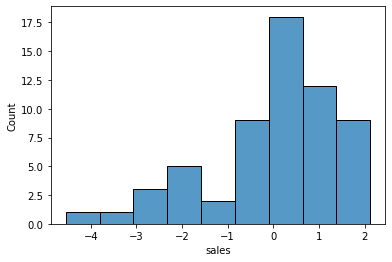

In [86]:
sb.histplot(residuals)
plt.show()

# Checking skewness 

In [87]:
residuals.skew()

-1.093518163944733

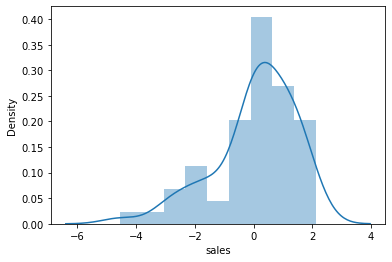

In [88]:
#Distribution
#distplot()
sb.distplot(residuals)
plt.show()

In [89]:
#In above distplot curve , -ve skewness found means no normal distributed curve
#found means it is a AS-symmetric curve means this assumption is not fullfill

# here we handled multicolinearity (removed multicolinearity (problem)
#but not working 3 assumption 
#means no relation relationship means here create a curve
##relation should be HOMOSKEDAStik : means datapoints are closely each other
#should not by Heteroskedastic  means should not be scattered
#if linear relationship occurs
# no normal distributed curve

In [90]:
# increase the degress of X means increase the power of X means 
#independent vairable(input variable)
#if increasing the degree or power of independent variable then It is called
#polynomial Linear regression(PLR)

In [91]:
#Input : TV and radio means X1=TV X2=radio  and output Y=sales
#increase the degree of input variable=2
#equation Y=m1*TV*2+m2*TV+m3*radio*2+m4*radio+b
#we work on dataset 
#apply polynomial linear regression means increase the degree of independent
#variable X means degree=2 
#equation : ax2+bx+c=0  here 2 inputs ax1*2+bx1+cx2*2+dx2+e
#here we have 2 inputs : - X=TV,radio means X1="TV" and X2="radio"
#eq. m1*TV*2+m2*TV1+m3*radio2+m4*radio*1+b

In [92]:
#Take input variable 
X=df[["TV","radio"]] #input always in 2D array
Y=df["sales"]

In [93]:
#call polynomial features inbuilt class which define in sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [128]:
#Create the object of polynimalFeatures class and pass the degree of independent variable X
pf=PolynomialFeatures(3) #here 2 is a degree of input means Quadratic relation

In [129]:
#the more degree we increase the more curve we get
pf

PolynomialFeatures(degree=3)

In [130]:
#fir_transform() :inbuilt method of polynomial feature class
#we create ploynomial version of x so we call fit_transform():inbuilt method of polynomialfeatures class
X_poly=pf.fit_transform(X)

In [131]:
#Same step apply of LinearRegression
#train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X_poly,Y,test_size=0.3,random_state=1)

In [132]:
#create the object of LinearRegression
lr6=LinearRegression()

In [133]:
#Train the data,using fit()
lr6.fit(X_train,Y_train)

LinearRegression()

In [134]:
#we testing the model means prediction
Y_pred=lr6.predict(X_test)

In [135]:
mean_squared_error(Y_test,Y_pred)

0.14469078646792338

In [136]:
r2_score(Y_test,Y_pred)

0.9941836818137308

In [137]:
#check 2,3 and 4 assumption
residuals=Y_test-Y_pred
print(residuals)

58    -0.041888
40     0.445638
34    -0.093118
102   -0.065757
184    0.179460
198    0.027800
95    -0.197140
4     -0.023023
29     0.143746
168    0.245208
171   -0.308870
18     0.530108
11     0.459830
89    -0.871036
110    0.445780
118   -0.579427
159   -0.447708
35    -0.460786
136    0.856041
59     0.131923
51    -0.196747
16    -0.069882
44     0.875771
94    -0.292173
31    -0.623031
162    0.126614
38     0.692022
28    -0.064441
193   -0.038868
27     0.253143
47     0.308808
165    0.158161
194   -0.097822
177   -0.394323
176    0.327206
97     0.126910
174   -0.092242
73    -0.037799
69    -0.187360
172    0.851225
108   -0.000472
107   -0.596018
189    0.426741
14     0.072516
56    -0.279619
19    -0.302362
114   -0.303319
39     0.288186
185    0.338592
124   -0.026599
98    -0.569396
123   -0.710938
119    0.076575
53    -0.262732
33    -0.056169
179    0.097471
181    0.111519
106    0.433444
199    0.226478
138    0.269316
Name: sales, dtype: float64


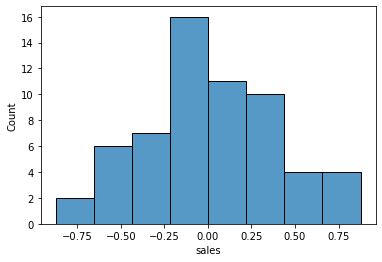

In [104]:
sb.histplot(residuals)
plt.show()

In [105]:
residuals.skew()

0.07135639590396214

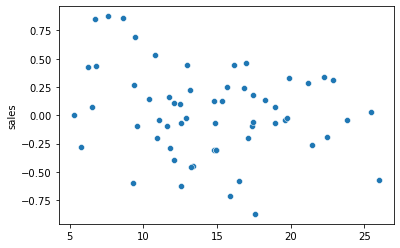

In [106]:
#check the assumption
plt.figure()
sb.scatterplot(Y_pred,residuals)
plt.show()